In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes

In [4]:
df= pd.read_csv("./data/coronavirus_updated_dataset.csv")

In [5]:
df.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [6]:
df.columns

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Recovered', 'Deaths'],
      dtype='object')

In [7]:
df = df.rename(columns={'Unnamed: 0':'Index','Province/State':'Province_State', 'Country/Region':'Country_Region'})

In [8]:
df.shape

(26334, 9)

In [9]:
df.dtypes

Index               int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Recovered           int64
Deaths              int64
dtype: object

In [10]:
df.head(10)

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0
5,5,British Columbia,Canada,49.2827,-123.1207,1/22/20,0,0,0
6,6,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0
7,7,Victoria,Australia,-37.8136,144.9631,1/22/20,0,0,0
8,8,Queensland,Australia,-28.0167,153.4000,1/22/20,0,0,0
9,9,NaN,Cambodia,11.5500,104.9167,1/22/20,0,0,0


In [11]:
df = df[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Recovered', 'Deaths']]

In [12]:
df.isna().sum()

Province_State    8151
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Recovered            0
Deaths               0
dtype: int64

In [13]:
df.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,26334.000000,26334.000000,26334.000000,26334.000000,26334.000000
mean,31.742141,-36.138645,153.451204,57.770791,5.068049
std,18.795646,80.132333,2487.497340,1295.084856,103.669715
min,-41.454500,-157.858400,0.000000,0.000000,0.000000
25%,27.610400,-93.061600,0.000000,0.000000,0.000000
50%,37.831650,-74.304550,0.000000,0.000000,0.000000
75%,42.315400,21.005900,0.000000,0.000000,0.000000
max,71.706900,174.886000,67800.000000,56927.000000,3122.000000


In [14]:
#number of cases per date
df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].sum()

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [15]:
df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].max()

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered,Deaths
Date,,,
1/22/20,444,28,17
1/23/20,444,28,17
1/24/20,549,31,24
1/25/20,761,32,40
1/26/20,1058,42,52
1/27/20,1423,45,76
1/28/20,3554,80,125
1/29/20,3554,88,125
1/30/20,4903,90,162


In [16]:
df_per_day= df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].max()

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,57.000000,57.000000,57.000000
mean,44840.087719,19036.368421,1740.315789
std,26549.113590,20335.832220,1166.253145
min,444.000000,28.000000,17.000000
25%,19665.000000,633.000000,549.000000
50%,62031.000000,10337.000000,2029.000000
75%,67332.000000,38557.000000,2871.000000
max,67800.000000,56927.000000,3122.000000


In [18]:
#Max num of cases
df_per_day['Confirmed'].max()

67800

In [19]:
#Min num of cases
df_per_day['Confirmed'].min()

444

In [20]:
#date for maximum number cases
df_per_day['Confirmed'].idxmax()

'3/18/20'

In [21]:
#date for minimum number cases
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [22]:
#Number of cases per country/province
df.groupby(['Country_Region'])['Confirmed', 'Recovered', 'Deaths'].max()

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Recovered,Deaths
Country_Region,,,
Afghanistan,22,1,0
Albania,59,0,2
Algeria,74,12,7
Andorra,39,1,0
Antigua and Barbuda,1,0,0
...,...,...,...
Uruguay,50,0,0
Uzbekistan,15,0,0
Venezuela,36,0,0


In [23]:
#Number of cases per country/province
df.groupby(['Province_State','Country_Region'])['Confirmed', 'Recovered', 'Deaths'].max()

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Confirmed,Recovered,Deaths
Province_State,Country_Region,,,
"Adams, IN",US,0,0,0
Alabama,US,46,0,0
"Alachua, FL",US,0,0,0
"Alameda County, CA",US,2,0,0
Alaska,US,6,0,0
...,...,...,...,...
Wyoming,US,15,0,0
Xinjiang,China,76,73,3
"Yolo County, CA",US,1,0,0


In [24]:
df['Country_Region'].value_counts()

US                        14079
China                      1881
Canada                      627
Australia                   513
France                      456
                          ...  
Bosnia and Herzegovina       57
Maldives                     57
Estonia                      57
Senegal                      57
Togo                         57
Name: Country_Region, Length: 152, dtype: int64

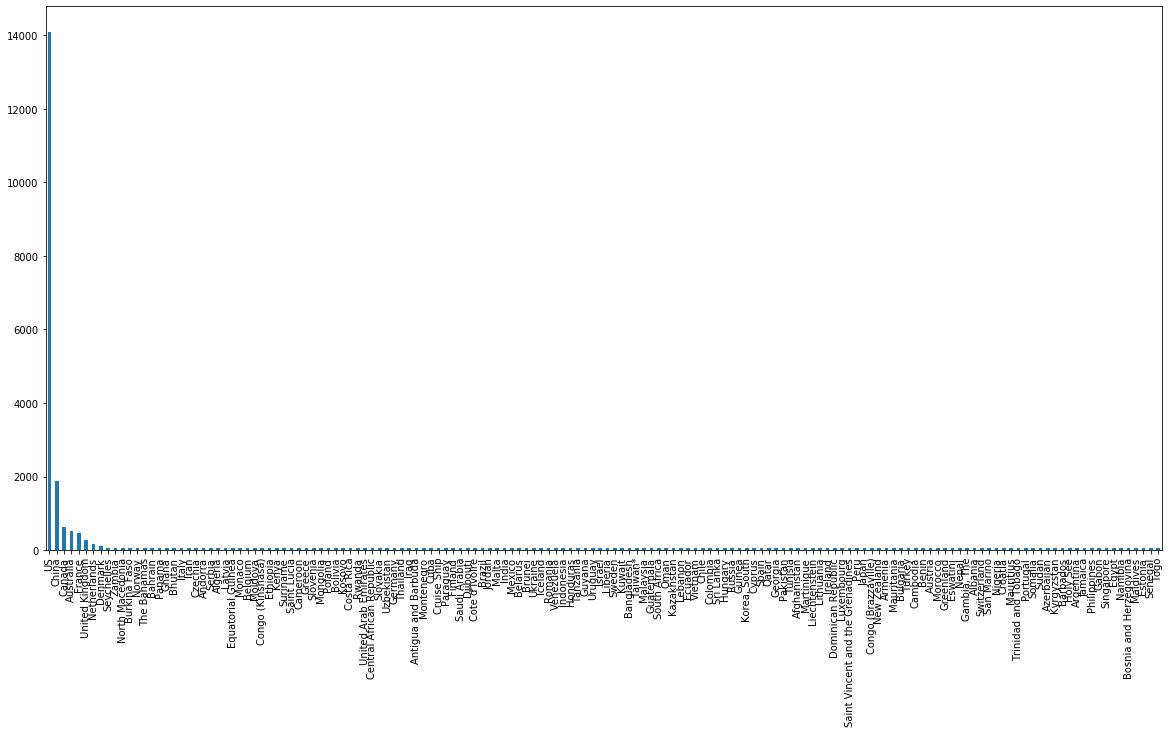

In [25]:
df['Country_Region'].value_counts().plot(kind='bar',figsize=(20,10))

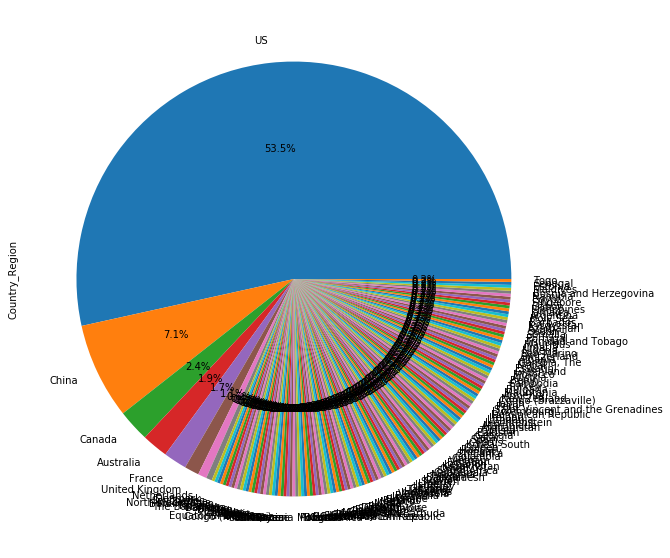

In [26]:
plt.figure(figsize=(20,10))
df['Country_Region'].value_counts().plot.pie(autopct="%1.1f%%")

In [27]:
#How many countries affected
df['Country_Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [28]:
len(df['Country_Region'].unique())

152

## Check for Distribution on map



In [29]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [30]:
#Coverting to geodataframe
gdf01= gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Long'],df['Lat']))

In [31]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)


In [32]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

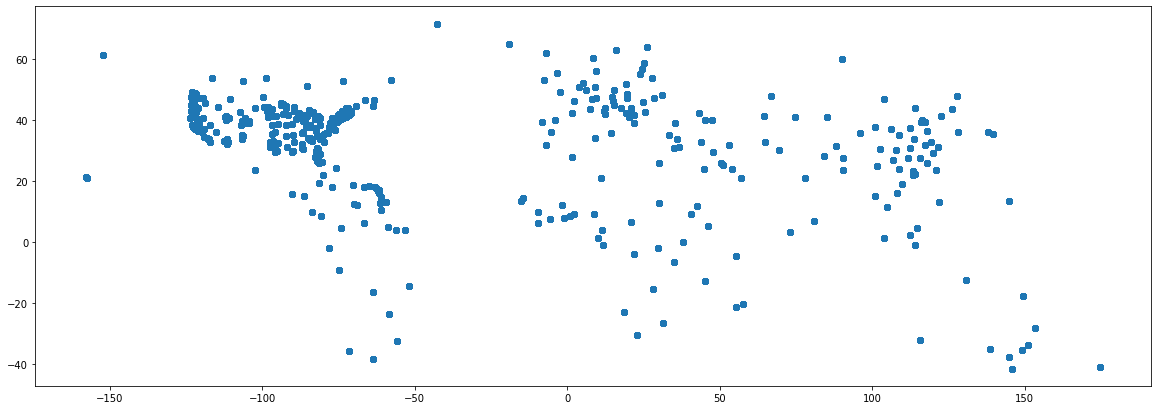

In [33]:
#map plot
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

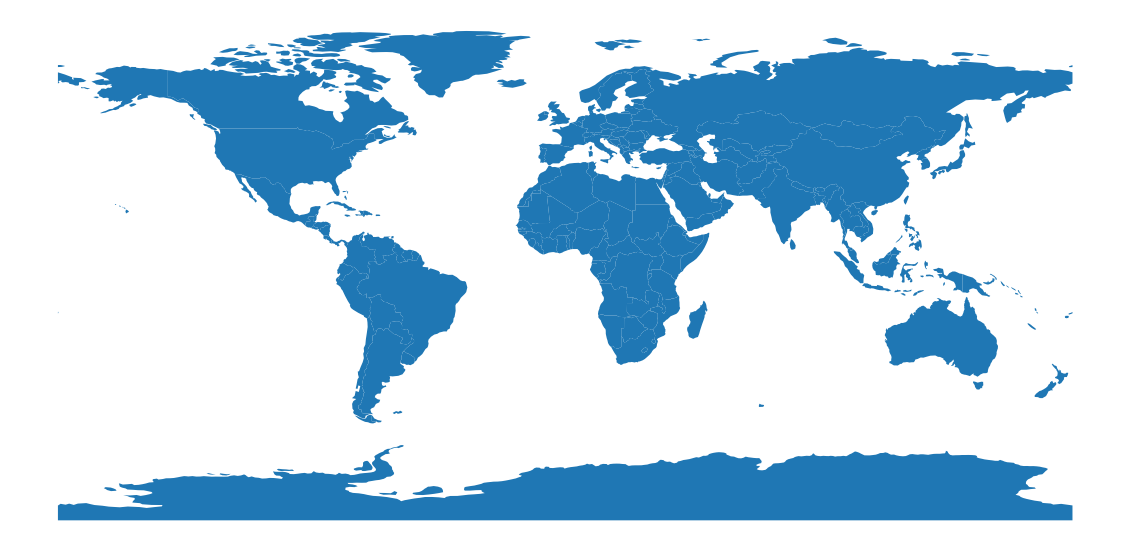

In [34]:
#overlapping with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

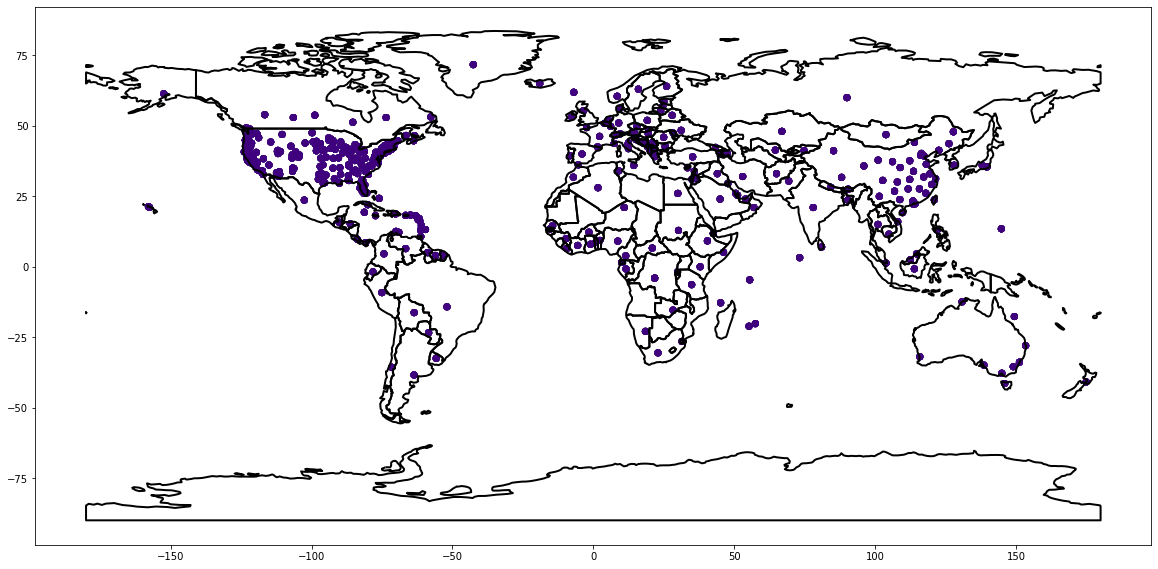

In [35]:
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [36]:
#Per Country
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [37]:
asia = world[world['continent'] == 'Asia']
africa = world[world['continent'] == 'Africa']
europe = world[world['continent'] == 'Europe']

In [38]:
asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [39]:
#Cases in India
gdf01[gdf01['Country_Region'] == 'India']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
15,NaN,India,21.0,78.0,1/22/20,0,0,0,POINT (78.00000 21.00000)
477,NaN,India,21.0,78.0,1/23/20,0,0,0,POINT (78.00000 21.00000)
939,NaN,India,21.0,78.0,1/24/20,0,0,0,POINT (78.00000 21.00000)
1401,NaN,India,21.0,78.0,1/25/20,0,0,0,POINT (78.00000 21.00000)
1863,NaN,India,21.0,78.0,1/26/20,0,0,0,POINT (78.00000 21.00000)
2325,NaN,India,21.0,78.0,1/27/20,0,0,0,POINT (78.00000 21.00000)
2787,NaN,India,21.0,78.0,1/28/20,0,0,0,POINT (78.00000 21.00000)
3249,NaN,India,21.0,78.0,1/29/20,0,0,0,POINT (78.00000 21.00000)
3711,NaN,India,21.0,78.0,1/30/20,1,0,0,POINT (78.00000 21.00000)
4173,NaN,India,21.0,78.0,1/31/20,1,0,0,POINT (78.00000 21.00000)


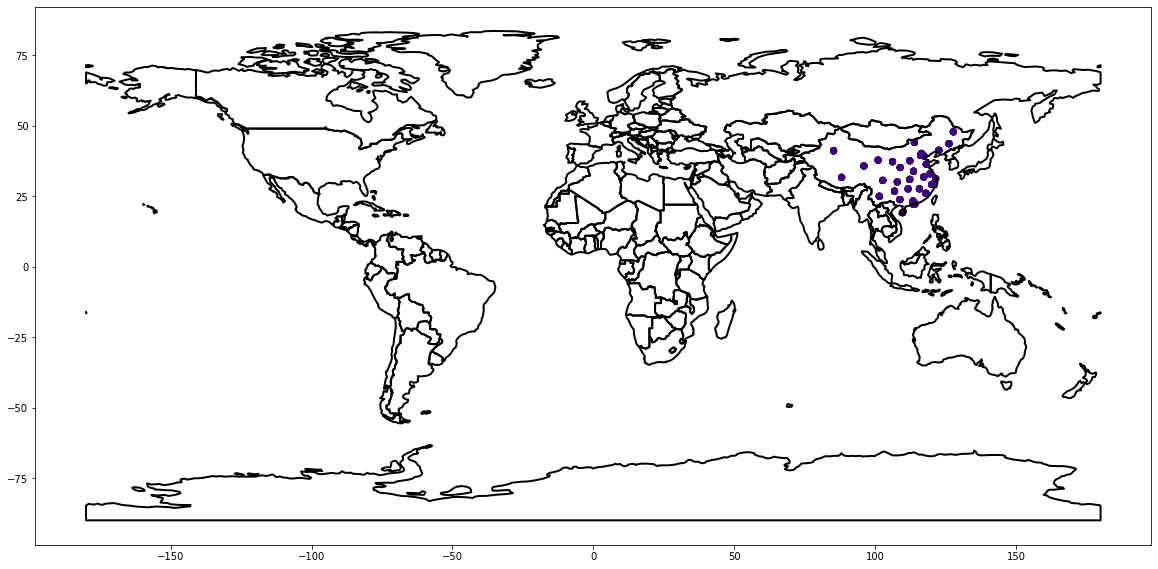

In [40]:
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

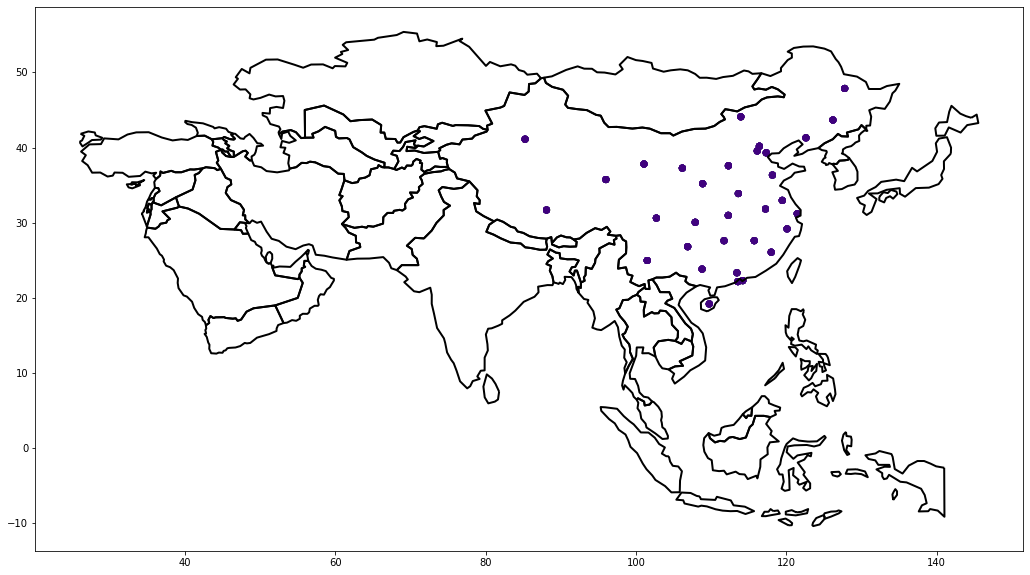

In [41]:
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'China'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [42]:
#time series trend
df2=df

In [43]:
import datetime as dt

In [44]:
df['cases_date'] = pd.to_datetime(df2['Date'])

In [45]:
df2.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Recovered                  int64
Deaths                     int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

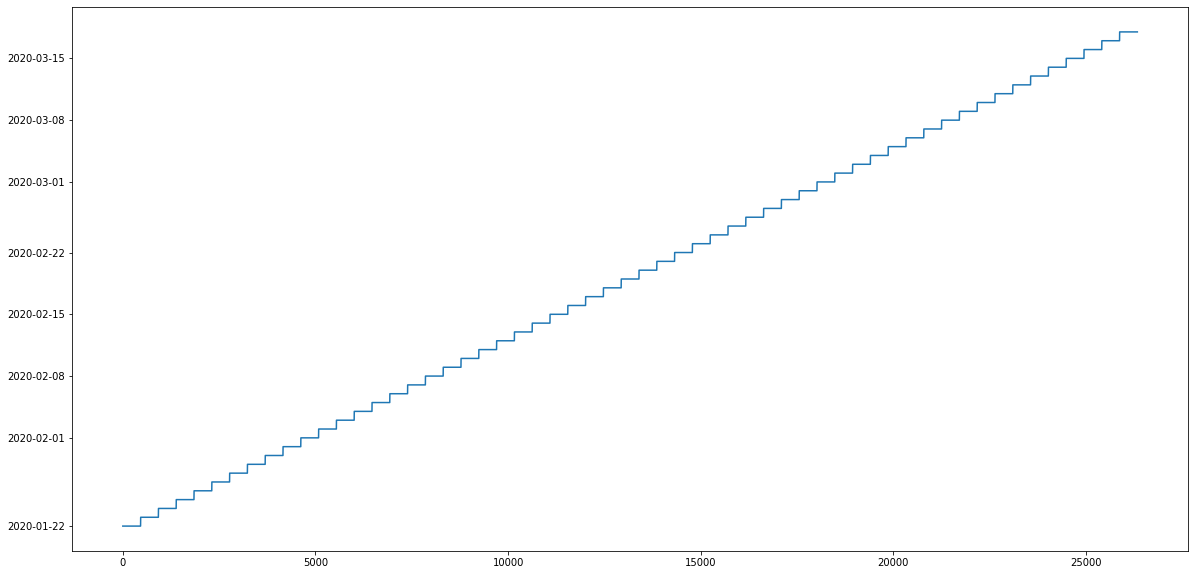

In [46]:
df['cases_date'].plot(figsize=(20,10))

In [47]:
ts = df2.set_index('cases_date')

In [48]:
ts

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
cases_date,,,,,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
2020-01-22,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2020-01-22,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
2020-01-22,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
2020-01-22,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)
...,...,...,...,...,...,...,...,...,...
2020-03-18,Aruba,Netherlands,12.5186,-70.0358,3/18/20,4,0,0,POINT (-70.03580 12.51860)
2020-03-18,NaN,Zambia,-15.4167,28.2833,3/18/20,2,0,0,POINT (28.28330 -15.41670)
2020-03-18,NaN,Djibouti,11.8251,42.5903,3/18/20,1,0,0,POINT (42.59030 11.82510)


In [49]:
#Select for March
ts.loc['2020-03']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
cases_date,,,,,,,,,
2020-03-01,NaN,Thailand,15.0000,101.0000,3/1/20,42,28,1,POINT (101.00000 15.00000)
2020-03-01,NaN,Japan,36.0000,138.0000,3/1/20,256,32,6,POINT (138.00000 36.00000)
2020-03-01,NaN,Singapore,1.2833,103.8333,3/1/20,106,72,0,POINT (103.83330 1.28330)
2020-03-01,NaN,Nepal,28.1667,84.2500,3/1/20,1,1,0,POINT (84.25000 28.16670)
2020-03-01,NaN,Malaysia,2.5000,112.5000,3/1/20,29,18,0,POINT (112.50000 2.50000)
...,...,...,...,...,...,...,...,...,...
2020-03-18,Aruba,Netherlands,12.5186,-70.0358,3/18/20,4,0,0,POINT (-70.03580 12.51860)
2020-03-18,NaN,Zambia,-15.4167,28.2833,3/18/20,2,0,0,POINT (28.28330 -15.41670)
2020-03-18,NaN,Djibouti,11.8251,42.5903,3/18/20,1,0,0,POINT (42.59030 11.82510)


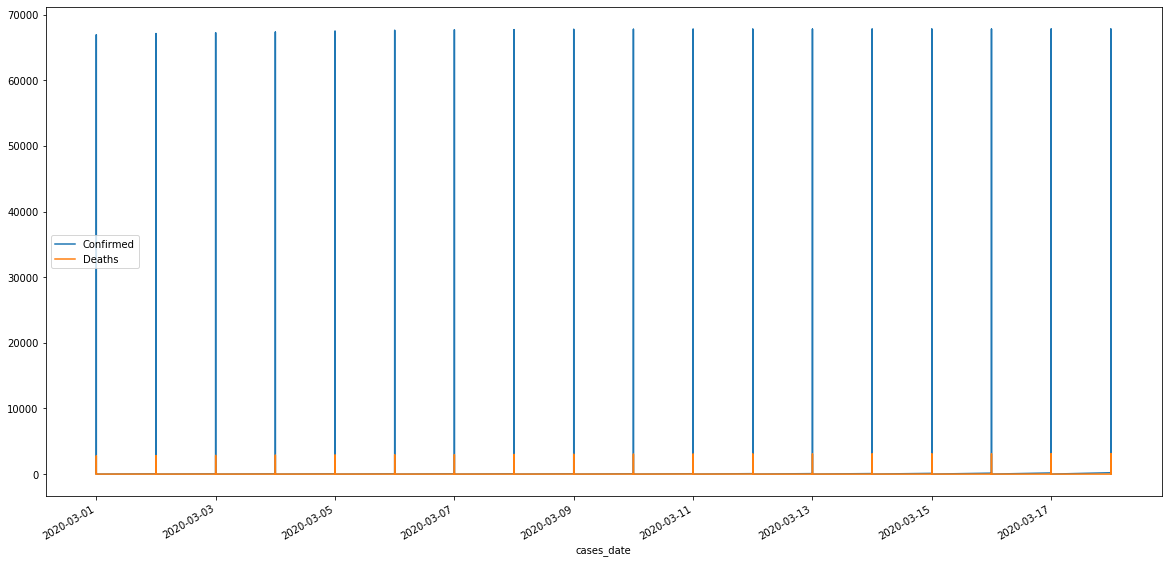

In [50]:
ts.loc['2020-03-01':'2020-03-18'][['Confirmed','Deaths']].plot(figsize=(20,10))

In [51]:
df_by_date = ts.groupby(['cases_date']).sum().reset_index(drop=None)

In [52]:
df_by_date

,cases_date,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,14664.869,-16696.0541,555,28,17
1,2020-01-23,14664.869,-16696.0541,653,30,18
2,2020-01-24,14664.869,-16696.0541,941,36,26
3,2020-01-25,14664.869,-16696.0541,1434,39,42
4,2020-01-26,14664.869,-16696.0541,2118,52,56
5,2020-01-27,14664.869,-16696.0541,2927,61,82
6,2020-01-28,14664.869,-16696.0541,5578,107,131
7,2020-01-29,14664.869,-16696.0541,6166,126,133
8,2020-01-30,14664.869,-16696.0541,8234,143,171
9,2020-01-31,14664.869,-16696.0541,9927,222,213


In [53]:
df_by_date.columns

Index(['cases_date', 'Lat', 'Long', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

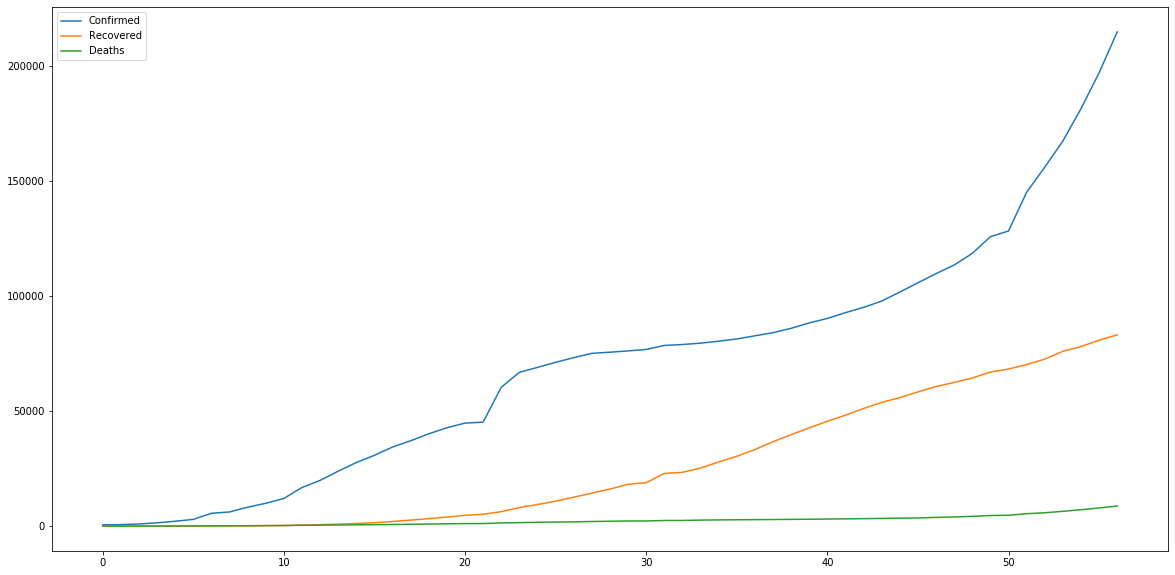

In [54]:
df_by_date[['Confirmed', 'Recovered', 'Deaths']].plot(kind='line',figsize=(20,10))